In [66]:
import re
import emoji
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:

# Charger les données annotées avec 'commentaire' et 'sentiment' (positif, négatif, neutre)
data=pd.read_csv('C:/Users/Lenovo/Desktop/cloud compuing/PFA/code/train_dataset3.csv')


In [68]:
data

id               user_name  \
0      1365695382076854280      Seeji Sundarakshan   
1      1379853509902934025             Tim Niblett   
2      1446041875815743491  KAS Sub-Saharan Africa   
3      1408683429072232448          CowinBangalore   
4      1410637131131805705                  🐝Lisa🐝   
...                    ...                     ...   
86810  1365360554186072070                   James   
86811  1441160179035381762                    CGTN   
86812  1423247259215405058       CoWIN Blore 18-44   
86813  1415288394859487233                   Owl 🦉   
86814  1439920800878903297       CoWIN Blore 18-44   

                      user_location  \
0                  Mumbai & Kerala.   
1      Burlington ON and Hudson FL    
2                   Berlin, Germany   
3                               NaN   
4                            Jersey   
...                             ...   
86810                Leeds, England   
86811                Beijing, China   
86812              Bengaluru, India   
86813                           NaN   
86814              Bengaluru, India   

                                        user_description         user_created  \
0      interest in geopolitics, economics, independen...  2016-09-04 09:39:11   
1                                                    NaN  2011-03-28 20:43:51   
2      Official account Sub-Saharan Africa Dept. @KAS...  2021-05-31 14:19:29   
3      Follow us to get update as soon as 18 plus vac...  2021-05-17 18:56:45   
4              A happy Bean living in a beautiful island  2009-05-02 15:15:26   
...                                                  ...                  ...   
86810                              $ocgn #ocgn #dogecoin  2020-06-11 20:27:59   
86811  CGTN is an international media organization. I...  2013-01-24 03:18:59   
86812  Get instant alerts for Free/Paid slots in BBMP...  2021-06-29 09:33:13   
86813  follow for updates on 18-44 vaccination availa...  2021-05-26 19:13:22   
86814  Get instant alerts for Free/Paid slots in BBMP...  2021-06-29 09:33:13   

       user_followers  user_friends  user_favourites  user_verified  \
0                 608           277            27106          False   
1                  88           219             5375          False   
2                 312           195              412          False   
3                1102             2               57          False   
4                  41           489             1940          False   
...               ...           ...              ...            ...   
86810              83           359             3943          False   
86811        13466879            74              167           True   
86812              19             0                1          False   
86813             147             0                1          False   
86814              22             0                2          False   

                      date  ...                          source retweets  \
0      2021-02-27 16:08:47  ...                 Twitter Web App        0   
1      2021-04-07 17:48:07  ...             Twitter for Android        0   
2      2021-10-07 09:17:04  ...                 Twitter Web App        0   
3      2021-06-26 07:07:56  ...               cowin_vaccine_app        0   
4      2021-07-01 16:31:15  ...              Twitter for iPhone        0   
...                    ...  ...                             ...      ...   
86810  2021-02-26 17:58:17  ...              Twitter for iPhone        6   
86811  2021-09-23 21:58:56  ...                       TweetDeck        5   
86812  2021-08-05 11:39:23  ...                  CowinAlertsBot        0   
86813  2021-07-14 12:33:42  ...  Cowin Vaccination Availability        0   
86814  2021-09-20 11:54:06  ...                  CowinAlertsBot        0   

      favorites  is_retweet  \
0             1       False   
1             2       False   
2             3       False   
3             0       False   
4           

In [69]:
# Assurez-vous que les ressources NLTK sont téléchargées
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Obtenir la liste des stop words en anglais
stop_words = set(stopwords.words('english'))




# Mots importants à conserver
mots_importants = {
    "not", "no", "nor", "isn't", "aren't", "wasn't", "weren't", "don't", "doesn't", 
    "didn't", "won't", "wouldn't", "shan't", "can't", "couldn't", "haven't", 
    "hasn't", "hadn't", "mustn't", "mightn't", "needn't", "shouldn't",
    "didn", "doesn", "hadn", "hasn", "haven", "isn", "shan", "wasn", "weren", "won", "wouldn"
}

# Créer une nouvelle liste de stop words en retirant les mots importants
stop_words_personnalises = stop_words - mots_importants

# Fonction de nettoyage du texte
def nettoyer_texte(texte):
    # Conversion des émojis en mots
    texte = emoji.demojize(texte)

    # Conversion en minuscules
    texte = texte.lower()

    # Suppression des liens URL
    texte = re.sub(r'http\S+|www\S+|https\S+', '', texte, flags=re.MULTILINE)

    # Suppression des mentions
    texte = re.sub(r'@\w+', '', texte)

    # Suppression du symbole # et garder le mot après
    texte = re.sub(r'#(\w+)', r'\1', texte)

    # Suppression des espaces supplémentaires
    texte = re.sub(r'\s+', ' ', texte).strip()

    # Garder lettres, chiffres, et les ponctuations importantes: ! ? . ,
    texte = re.sub(r'[^\w\s!?.,]', '', texte)

    # Expansion des contractions
    texte = contractions.fix(texte)

    # Tokenisation
    tokens = word_tokenize(texte)

    # Suppression des stop words personnalisés
    tokens = [mot for mot in tokens if mot not in stop_words_personnalises]

    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(mot) for mot in tokens]

    # Reconstitution du texte nettoyé
    texte_nettoye = ' '.join(tokens)

    return texte_nettoye



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
# Exemple d'utilisation
texte_exemple = """
I am very happy with the Service! You can't visit our @gmil site http://example.com
#satisfaction @service 😊👍
"""

texte_nettoyee = nettoyer_texte(texte_exemple)
print(texte_nettoyee)


happy service ! not visit site satisfaction smiling_face_with_smiling_eyesthumbs_up


In [71]:
# Nettoyer les commentaires
data['cleaned_comments'] = data['text'].apply(nettoyer_texte)

In [72]:
data

id               user_name  \
0      1365695382076854280      Seeji Sundarakshan   
1      1379853509902934025             Tim Niblett   
2      1446041875815743491  KAS Sub-Saharan Africa   
3      1408683429072232448          CowinBangalore   
4      1410637131131805705                  🐝Lisa🐝   
...                    ...                     ...   
86810  1365360554186072070                   James   
86811  1441160179035381762                    CGTN   
86812  1423247259215405058       CoWIN Blore 18-44   
86813  1415288394859487233                   Owl 🦉   
86814  1439920800878903297       CoWIN Blore 18-44   

                      user_location  \
0                  Mumbai & Kerala.   
1      Burlington ON and Hudson FL    
2                   Berlin, Germany   
3                               NaN   
4                            Jersey   
...                             ...   
86810                Leeds, England   
86811                Beijing, China   
86812              Bengaluru, India   
86813                           NaN   
86814              Bengaluru, India   

                                        user_description         user_created  \
0      interest in geopolitics, economics, independen...  2016-09-04 09:39:11   
1                                                    NaN  2011-03-28 20:43:51   
2      Official account Sub-Saharan Africa Dept. @KAS...  2021-05-31 14:19:29   
3      Follow us to get update as soon as 18 plus vac...  2021-05-17 18:56:45   
4              A happy Bean living in a beautiful island  2009-05-02 15:15:26   
...                                                  ...                  ...   
86810                              $ocgn #ocgn #dogecoin  2020-06-11 20:27:59   
86811  CGTN is an international media organization. I...  2013-01-24 03:18:59   
86812  Get instant alerts for Free/Paid slots in BBMP...  2021-06-29 09:33:13   
86813  follow for updates on 18-44 vaccination availa...  2021-05-26 19:13:22   
86814  Get instant alerts for Free/Paid slots in BBMP...  2021-06-29 09:33:13   

       user_followers  user_friends  user_favourites  user_verified  \
0                 608           277            27106          False   
1                  88           219             5375          False   
2                 312           195              412          False   
3                1102             2               57          False   
4                  41           489             1940          False   
...               ...           ...              ...            ...   
86810              83           359             3943          False   
86811        13466879            74              167           True   
86812              19             0                1          False   
86813             147             0                1          False   
86814              22             0                2          False   

                      date  ... retweets favorites is_retweet  \
0      2021-02-27 16:08:47  ...        0         1      False   
1      2021-04-07 17:48:07  ...        0         2      False   
2      2021-10-07 09:17:04  ...        0         3      False   
3      2021-06-26 07:07:56  ...        0         0      False   
4      2021-07-01 16:31:15  ...        0         0      False   
...                    ...  ...      ...       ...        ...   
86810  2021-02-26 17:58:17  ...        6        12      False   
86811  2021-09-23 21:58:56  ...        5        10      False   
86812  2021-08-05 11:39:23  ...        0         0      False   
86813  2021-07-14 12:33:42  ...        0         0      False   
86814  2021-09-20 11:54:06  ...        0         0      False   

                                   cleaned_text_textblob  polarity  \
0      consolation good number sputnikv instead going...      0.70   
1      wife got 2nd moderna shot yesterday florida . ...      0.25   
2      following author study tom bayes , china prese...      0.00   
3      560011 , age

In [73]:
print(data['cleaned_comments'].str.strip().eq('').sum())  # Vérifiez les chaînes vides


330


In [74]:
# Supprimer les lignes où la colonne 'text' est nulle ou vide
data = data[~data['cleaned_comments'].isnull() & (data['cleaned_comments'].str.strip() != '')]


In [75]:

# Mapping des labels
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [76]:


# Diviser en features (X) et labels (y)
X = data['cleaned_comments']
y = data['Sentiment_vader'].map(label_mapping)



In [77]:
X

0        consolation good number sputnikv instead going...
1        wife got 2nd moderna shot yesterday florida . ...
2        following author study tom bayes , china prese...
3        560011 , age 45 41d1 , 276d2 slot , covaxin 30...
4                      happy 2nd vaccine day ! ! ! moderna
                               ...                        
86810    ocgn stock smiling_face_with_sunglasses , huge...
86811    noted modis visit go current you.s . fda cdc q...
86812    pincode 560027 covaxin dose 2 50 slot age 18 a...
86813    180342 400602 , 16072021 , 61 dose2 highway ho...
86814    pincode 560003 covaxin dose 2 20 slot age 18 a...
Name: cleaned_comments, Length: 86485, dtype: object

In [78]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(stop_words=list(stop_words_personnalises))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [80]:
# Entraînement du modèle SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Ajustez la valeur de C si nécessaire

svm_model.fit(X_train_vectorized, y_train)

# Prédictions sur l'ensemble d'entraînement et de test
y_pred_train = svm_model.predict(X_train_vectorized)
y_pred_test = svm_model.predict(X_test_vectorized)

Train Accuracy: 97.20%
Validation Accuracy: 94.08%

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5844
           1       0.95      0.97      0.96      5645
           2       0.95      0.94      0.94      5808

    accuracy                           0.94     17297
   macro avg       0.94      0.94      0.94     17297
weighted avg       0.94      0.94      0.94     17297



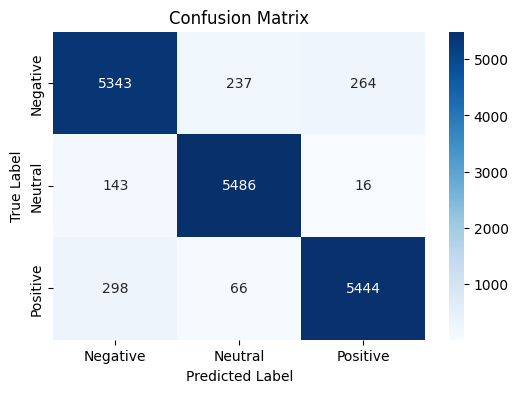

In [81]:
# Calcul de l'accuracy pour l'entraînement et la validation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


# Affichage des résultats
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {test_accuracy * 100:.2f}%")

# Évaluation du modèle sur l'ensemble de test
print("\nClassification Report (Validation):")
print(classification_report(y_test, y_pred_test))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Affichage de la matrice de confusion avec une heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [113]:
# 10. Afficher la matrice de confusion
conf_matrix = confusion_matrix(sentiment, predictions)
print("\nMatrice de confusion :")
print(conf_matrix)


Matrice de confusion :
[[6709  300  369]
 [ 167 6983   13]
 [ 377   69 6717]]


### tester svm

In [103]:

# Charger les données annotées avec 'commentaire' et 'sentiment' (positif, négatif, neutre)
nouveaux_donnees=pd.read_csv('C:/Users/Lenovo/Desktop/cloud compuing/PFA/code/test_dataset3.csv')


In [84]:
nouveaux_donnees

id                     user_name       user_location  \
0      1379868649431965699         Covid Vaccine Victims                 NaN   
1      1403691682084704262                CowinBangalore                 NaN   
2      1370150232453955585                   Dirt Simple                 NaN   
3      1366252167921770496                    rocky cool                 NaN   
4      1451399755448291334  विमल पाण्डे | Vimal Pandey🇮🇳                भारत   
...                    ...                           ...                 ...   
21699  1410065031501254656                  angsumandeka         Seattle, WA   
21700  1376803571291758595               Harsha de Silva  Colombo, Sri Lanka   
21701  1432878456866410496                        VaxBLR    Bengaluru, India   
21702  1420270807205376009                         Owl 🦉                 NaN   
21703  1351941859761905666                        Jordan  Aylesbury, England   

                                        user_description         user_created  \
0      Documenting side effects and victims of the #C...  2021-04-05 17:03:28   
1      Follow us to get update as soon as 18 plus vac...  2021-05-17 18:56:45   
2      You can't ignore the impact that the blues has...  2018-12-01 02:59:13   
3                                                    NaN  2016-10-25 07:40:16   
4      ॥ जननी जन्मभूमिश्च स्वर्गादपि गरीयसी ॥ Mother ...  2009-07-10 23:54:05   
...                                                  ...                  ...   
21699  Travel. Sightsensing. Photography. Triathlon. ...  2019-07-19 08:00:34   
21700  Father. Husband. #SriLanka Citizen. MP for Col...  2013-10-18 13:18:06   
21701  Hourly updates on FREE and PAID 18+ and 45+ va...  2021-06-21 08:44:34   
21702  follow for updates on 18-44 vaccination availa...  2021-05-26 19:13:22   
21703  Tube driver instructor, SCAS Community first r...  2013-06-19 10:49:43   

       user_followers  user_friends  user_favourites  user_verified  \
0                 150            73              353          False   
1                1146             2               53          False   
2                 266           339             9050          False   
3                   0            75             2039          False   
4                 913           189             7388          False   
...               ...           ...              ...            ...   
21699              45           682             1513          False   
21700          274206            26              225           True   
21701              23             0                0          False   
21702             175             0                1          False   
21703             185           126             1626          False   

                      date  ...                          source retweets  \
0      2021-04-07 18:48:17  ...                 Twitter Web App        1   
1      2021-06-12 12:32:30  ...               cowin_vaccine_app        0   
2      2021-03-11 23:10:46  ...              Twitter for iPhone        0   
3      2021-03-01 05:01:15  ...                 Twitter Web App        0   
4      2021-10-22 04:07:22  ...              Twitter for iPhone        0   
...                    ...  ...                             ...      ...   
21699  2021-06-30 02:37:55  ...              Twitter for iPhone        1   
21700  2021-03-30 07:48:45  ...              Twitter for iPhone       14   
21701  2021-09-01 01:30:20  ...                          VaxBlr        0   
21702  2021-07-28 06:32:02  ...  Cowin Vaccination Availability        0   
21703  2021-01-20 17:17:11  ...              Twitter for iPhone        1   

      favorites  is_retweet  \
0             0       False   
1             0       False   
2             0       False   
3             0       False   
4             1       False   
...         ...         ...   
21699         1       False   
21700        57       False   
21701         0       False   
21702         

In [104]:
# Étape 1 : Nettoyer les nouveaux commentaires
nouveaux_donnees['cleaned_comments'] = nouveaux_donnees['text'].apply(nettoyer_texte)


In [105]:
# Étape 2 : Vectoriser les nouveaux commentaires avec le même vectoriseur
nouveaux_donnees_vectorized = vectorizer.transform(nouveaux_donnees['cleaned_comments'])


In [106]:
# Étape 3 : Prédire les classes pour les nouveaux commentaires
predictions = svm_model.predict(nouveaux_donnees_vectorized)

# Mapping des labels pour l'affichage
reverse_label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# # Afficher les résultats
# for text, pred in zip(nouveaux_donnees['text'], predictions):
#     sentiment = reverse_label_mapping[pred]
#     print(f"Texte : '{text}' -> Prédiction : {sentiment}")


In [107]:
predictions

array([0, 1, 1, ..., 2, 1, 0], dtype=int64)

In [108]:

# Mapping des labels
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
sentiment=nouveaux_donnees['Sentiment_vader'].map(label_mapping)

In [109]:
sentiment

0        0
1        1
2        1
3        2
4        1
        ..
21699    2
21700    1
21701    2
21702    1
21703    2
Name: Sentiment_vader, Length: 21704, dtype: int64

In [110]:
# Étape 4 : Calculer l'accuracy
accuracy = accuracy_score(sentiment, predictions)
print(f"\nAccuracy sur l'ensemble de test : {accuracy * 100:.2f}%")


Accuracy sur l'ensemble de test : 94.03%


In [111]:
# 10. Afficher la matrice de confusion
conf_matrix = confusion_matrix(sentiment, predictions)
print("\nMatrice de confusion :")
print(conf_matrix)



Matrice de confusion :
[[6709  300  369]
 [ 167 6983   13]
 [ 377   69 6717]]


In [112]:
# 11. Afficher le rapport de classification
print("\nRapport de classification :")
print(classification_report(sentiment, predictions))


Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7378
           1       0.95      0.97      0.96      7163
           2       0.95      0.94      0.94      7163

    accuracy                           0.94     21704
   macro avg       0.94      0.94      0.94     21704
weighted avg       0.94      0.94      0.94     21704

